['../results/synthetic_encode_barrier/input_1mb.bin', '../results/synthetic_encode_barrier/input_5mb.bin', '../results/synthetic_encode_barrier/input_10mb.bin', '../results/synthetic_encode_barrier/input_50mb.bin', '../results/synthetic_encode_barrier/input_100mb.bin', '../results/synthetic_encode_barrier/input_500mb.bin', '../results/synthetic_encode_barrier/input_1gb.bin', '../results/synthetic_encode_barrier/input_5gb.bin', '../results/synthetic_encode_barrier/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[0.10844866666666668, 0.10286133333333332, 0.08258966666666666, 0.09053166666666668, 0.07176666666666666, 0.11001166666666666, 0.13376166666666667, 0.21102633333333332, 0.17047566666666666, 0.2531293333333333]
[0.40730266666666665, 0.200757, 0.125544, 0.10373033333333333, 0.096981, 0.07860466666666666, 0.078905, 0.07674633333333333, 0.090632, 0.088318]
[0.7611146666666665, 0.4737096666666667, 0.265827, 0.20842300000000002,

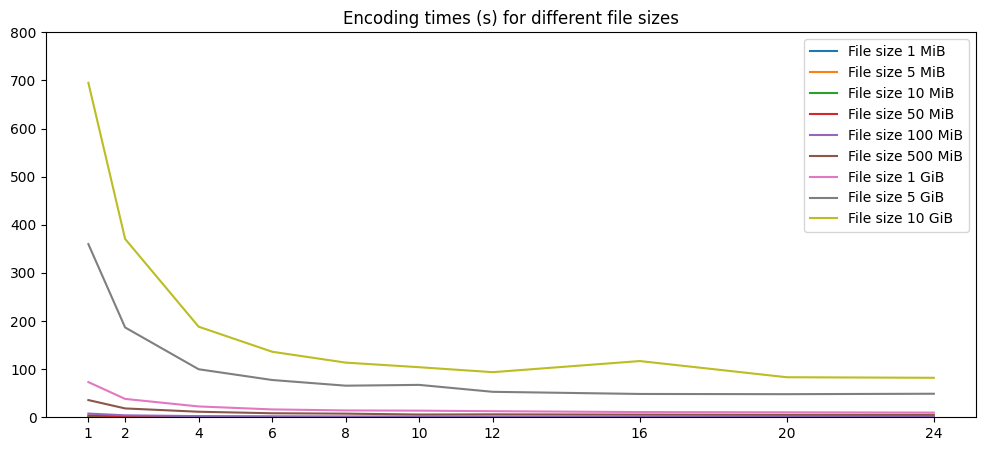

In [4]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join

# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_encode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_overall_Wall = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_list.append(thread_data[thread]['Overall']['Wall'])
    results_matrix_overall_Wall.append(temp_list)

for i in results_matrix_overall_Wall:
    print(i)
x = threads
print(threads)
plt.figure(figsize=(12, 5))
plt.ylim(0, 800)
# x_ticks = range(threads)
plt.xticks(threads, threads)
# plot the results
for i,size in zip(range(len(results_matrix_overall_Wall)),file_sizes):
    plt.plot(threads,results_matrix_overall_Wall[i], label='File size '+size)
plt.title('Encoding times (s) for different file sizes')
# plt.plot(results_matrix_overall_Wall)
plt.legend()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_decode_locks'

def json_to_pd(path):
    file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
    sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
    print(sorted_files)
    results_matrix_encode_Wall_barrier = []
    results_matrix_overall_Wall_barrier = []
    threads = []
    file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
    print(file_sizes)
    for file_folder in sorted_files:
        json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
        thread_data = json.load(open(json_file[0]))
        temp_list = []
        temp_all_list = []
        for thread in sorted(thread_data,key= lambda x: int(x)):
            if int(thread) not in threads:
                threads.append(int(thread))
            #time = thread_data[thread]['Frequencies']['Wall']
            #time += thread_data[thread]['Tree']['Wall']
            time = thread_data[thread]['Decode']['Wall']
            temp_list.append(time)
            temp_all_list.append(thread_data[thread]['Overall']['Wall'])
        results_matrix_encode_Wall_barrier.append(temp_list)
        results_matrix_overall_Wall_barrier.append(temp_all_list)
    
    return np.matrix(results_matrix_encode_Wall_barrier), np.matrix(results_matrix_overall_Wall_barrier), threads, file_sizes

def tex_bolder(tex_input,minimum=True):
    st = tex_input
    splitted = st.split('\n')
    for j,line in enumerate(splitted):
        if j>3 and j<len(splitted)-2:
            if minimum:
                current_max=float('inf')
            else:
                current_max=float('-inf')
            for i,item in enumerate(line.split('&')):
                if 'MiB' not in item and 'GiB' not in item:
                    itemed = item.split(' ')
                    for it in itemed:
                        try:
                            if minimum:
                                current_max = min(current_max, float(it))
                            else:
                                current_max = max(current_max, float(it))
                        except:
                            pass
            splitted[j] = line.replace(str(current_max), '\\textbf{'+str(current_max)+'}')
    return '\n'.join(splitted)

encode_wall_barrier, overall_wall_barrier, threads, file_sizes = json_to_pd(path)
print(threads)
df_encode = pd.DataFrame(encode_wall_barrier, columns=threads, index=file_sizes)
print(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))

df_overall = pd.DataFrame(overall_wall_barrier, columns=threads, index=file_sizes)
print(tex_bolder(df_overall.to_latex(index=True,float_format="%.3f"),minimum=True))

# effiecincies
matrix_enc_eff = 1/((encode_wall_barrier/encode_wall_barrier[:,0]))/np.matrix(threads)
df_overall_efficiency = pd.DataFrame(matrix_enc_eff, columns=threads, index=file_sizes)
# display(df_overall_efficiency)
print(df_overall_efficiency.to_latex(index=True,float_format="%.3f"))

matrix_overall_eff = 1/((overall_wall_barrier/overall_wall_barrier[:,0]))/np.matrix(threads)
df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
print(df_encode_efficiency.to_latex(index=True,float_format="%.3f"))


['../synthetic_decode_locks/input_1mb.bin.huf', '../synthetic_decode_locks/input_5mb.bin.huf', '../synthetic_decode_locks/input_10mb.bin.huf', '../synthetic_decode_locks/input_50mb.bin.huf', '../synthetic_decode_locks/input_100mb.bin.huf', '../synthetic_decode_locks/input_500mb.bin.huf', '../synthetic_decode_locks/input_1gb.bin.huf', '../synthetic_decode_locks/input_5gb.bin.huf', '../synthetic_decode_locks/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64]
\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
{} &      1  &      2  &      4  &      6  &      8  &      10 &      12 &     16 &     20 &     24 &      32 &     48 &     64 \\
\midrule
1 MiB   &   0.116 &   0.064 &   0.056 &   0.056 &   0.041 &   0.041 &   0.038 &  0.041 &  0.038 &  0.035 &   0.061 &  \textbf{0.006} &  0.007 \\
5 MiB   &   0.565 &   0.859 &   1.202 &   0.598 &   0.627 &   0.234 &   0.425 &  0.244 &  0.269 &  0.113 &

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_2614/3277470125.py:71: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))
/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_2614/3277470125.py:74: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tex_bolder(df_overall.to_latex(index=True,float_format="%.3f"),minimum=True))
/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipyker

In [5]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_decode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




['../synthetic_decode_barrier/input_1mb.bin.huf', '../synthetic_decode_barrier/input_5mb.bin.huf', '../synthetic_decode_barrier/input_10mb.bin.huf', '../synthetic_decode_barrier/input_50mb.bin.huf', '../synthetic_decode_barrier/input_100mb.bin.huf', '../synthetic_decode_barrier/input_500mb.bin.huf', '../synthetic_decode_barrier/input_1gb.bin.huf', '../synthetic_decode_barrier/input_5gb.bin.huf', '../synthetic_decode_barrier/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &        16 &        20 &        24 \\
\midrule
1 MiB   &    0.0700 &    0.0767 &    0.0833 &    0.0767 &    0.0800 &    0.0733 &    0.0800 &    0.0867 &    0.0800 &    0.0833 \\
5 MiB   &    0.3267 &    0.3400 &    0.3533 &    0.3767 &    0.3733 &    0.3833 &    0.3867 &    0.3800 &    0.3733 &    0

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/3767911066.py:42: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0700,0.0767,0.0833,0.0767,0.0800,0.0733,0.0800,0.0867,0.0800,0.0833
5 MiB,0.3267,0.3400,0.3533,0.3767,0.3733,0.3833,0.3867,0.3800,0.3733,0.3800
10 MiB,0.7300,0.7333,0.7533,0.7600,0.7667,0.7833,0.7867,0.7900,0.7867,0.7900
50 MiB,3.6367,3.6933,3.8367,3.8700,3.9733,3.9767,3.9600,3.9933,3.9967,3.9833
100 MiB,7.1200,7.0733,7.5800,7.5800,7.8300,7.8600,7.8900,7.8900,7.8367,7.9000
500 MiB,35.9467,36.6700,37.6567,38.7167,39.0700,39.6200,39.7000,39.7667,39.7100,40.2400
1 GiB,73.6033,75.6833,75.7067,77.5900,78.7900,80.3433,80.4233,80.2633,81.5467,81.1733
5 GiB,353.6033,358.8433,366.6500,377.9167,392.9700,385.7767,388.5667,380.3600,379.7333,374.6033
10 GiB,744.9233,755.6800,767.4900,783.9000,792.3767,800.2200,802.1467,802.9500,812.9767,825.6600


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.9130 &  0.8400 &  0.9130 &  0.8750 &  0.9545 &  0.8750 &  0.8077 &  0.8750 &  0.8400 \\
5 MiB   &  1.0 &  0.9608 &  0.9245 &  0.8673 &  0.8750 &  0.8522 &  0.8448 &  0.8596 &  0.8750 &  0.8596 \\
10 MiB  &  1.0 &  0.9955 &  0.9690 &  0.9605 &  0.9522 &  0.9319 &  0.9280 &  0.9241 &  0.9280 &  0.9241 \\
50 MiB  &  1.0 &  0.9847 &  0.9479 &  0.9397 &  0.9153 &  0.9145 &  0.9184 &  0.9107 &  0.9099 &  0.9130 \\
100 MiB &  1.0 &  1.0066 &  0.9393 &  0.9393 &  0.9093 &  0.9059 &  0.9024 &  0.9024 &  0.9085 &  0.9013 \\
500 MiB &  1.0 &  0.9803 &  0.9546 &  0.9285 &  0.9201 &  0.9073 &  0.9055 &  0.9039 &  0.9052 &  0.8933 \\
1 GiB   &  1.0 &  0.9725 &  0.9722 &  0.9486 &  0.9342 &  0.9161 &  0.9152 &  0.9170 &  0.9026 &  0.9067 \\
5 GiB   &  1.0 &  0.9854 &  0.9644 &  0.9357 &  0.8998 &  0.9166 &  0.9100 &  0.9297 &  0.9312

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/3767911066.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.9130,0.8400,0.9130,0.8750,0.9545,0.8750,0.8077,0.8750,0.8400
5 MiB,1.0,0.9608,0.9245,0.8673,0.8750,0.8522,0.8448,0.8596,0.8750,0.8596
10 MiB,1.0,0.9955,0.9690,0.9605,0.9522,0.9319,0.9280,0.9241,0.9280,0.9241
50 MiB,1.0,0.9847,0.9479,0.9397,0.9153,0.9145,0.9184,0.9107,0.9099,0.9130
100 MiB,1.0,1.0066,0.9393,0.9393,0.9093,0.9059,0.9024,0.9024,0.9085,0.9013
500 MiB,1.0,0.9803,0.9546,0.9285,0.9201,0.9073,0.9055,0.9039,0.9052,0.8933
1 GiB,1.0,0.9725,0.9722,0.9486,0.9342,0.9161,0.9152,0.9170,0.9026,0.9067
5 GiB,1.0,0.9854,0.9644,0.9357,0.8998,0.9166,0.9100,0.9297,0.9312,0.9439
10 GiB,1.0,0.9858,0.9706,0.9503,0.9401,0.9309,0.9287,0.9277,0.9163,0.9022


In [7]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




['../synthetic_encode_barrier/input_1mb.bin', '../synthetic_encode_barrier/input_5mb.bin', '../synthetic_encode_barrier/input_10mb.bin', '../synthetic_encode_barrier/input_50mb.bin', '../synthetic_encode_barrier/input_100mb.bin', '../synthetic_encode_barrier/input_500mb.bin', '../synthetic_encode_barrier/input_1gb.bin', '../synthetic_encode_barrier/input_5gb.bin', '../synthetic_encode_barrier/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &         16 &         20 &         24 \\
\midrule
1 MiB   &    0.0700 &    0.0900 &    0.1200 &    0.2067 &    0.2033 &    0.4133 &    0.6233 &     1.5033 &     1.6433 &     3.0367 \\
5 MiB   &    0.3167 &    0.3333 &    0.3600 &    0.4100 &    0.4433 &    0.4600 &    0.5367 &     0.6400 &     0.8367 &     0.9733 \\
10 MiB  &    0.690

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2302000924.py:42: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0700,0.0900,0.1200,0.2067,0.2033,0.4133,0.6233,1.5033,1.6433,3.0367
5 MiB,0.3167,0.3333,0.3600,0.4100,0.4433,0.4600,0.5367,0.6400,0.8367,0.9733
10 MiB,0.6900,0.7567,0.8267,0.8767,0.9767,1.0600,1.4933,2.2267,2.5667,4.6933
50 MiB,3.4733,3.7200,3.9400,4.0933,4.3200,4.7567,5.4633,5.7600,7.9200,12.0900
100 MiB,7.0733,7.2933,7.8133,8.0867,8.6633,9.2467,9.5733,11.2500,13.5733,19.4500
500 MiB,33.9733,35.0833,37.1000,40.2267,42.1233,44.1433,45.5767,49.9833,56.1100,62.1400
1 GiB,70.5833,72.1000,75.6033,81.4833,85.4033,89.6733,93.2767,98.8733,112.3600,123.6600
5 GiB,348.7967,366.4733,384.7200,407.8200,420.0800,498.5800,436.0733,463.1900,533.1233,567.0100
10 GiB,673.3600,709.0633,732.1300,777.9033,828.3567,876.5133,912.7100,1311.0300,1083.8067,1323.1967


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.7778 &  0.5833 &  0.3387 &  0.3443 &  0.1694 &  0.1123 &  0.0466 &  0.0426 &  0.0231 \\
5 MiB   &  1.0 &  0.9500 &  0.8796 &  0.7724 &  0.7143 &  0.6884 &  0.5901 &  0.4948 &  0.3785 &  0.3253 \\
10 MiB  &  1.0 &  0.9119 &  0.8347 &  0.7871 &  0.7065 &  0.6509 &  0.4621 &  0.3099 &  0.2688 &  0.1470 \\
50 MiB  &  1.0 &  0.9337 &  0.8816 &  0.8485 &  0.8040 &  0.7302 &  0.6358 &  0.6030 &  0.4386 &  0.2873 \\
100 MiB &  1.0 &  0.9698 &  0.9053 &  0.8747 &  0.8165 &  0.7650 &  0.7389 &  0.6287 &  0.5211 &  0.3637 \\
500 MiB &  1.0 &  0.9684 &  0.9157 &  0.8445 &  0.8065 &  0.7696 &  0.7454 &  0.6797 &  0.6055 &  0.5467 \\
1 GiB   &  1.0 &  0.9790 &  0.9336 &  0.8662 &  0.8265 &  0.7871 &  0.7567 &  0.7139 &  0.6282 &  0.5708 \\
5 GiB   &  1.0 &  0.9518 &  0.9066 &  0.8553 &  0.8303 &  0.6996 &  0.7999 &  0.7530 &  0.6543

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2302000924.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.7778,0.5833,0.3387,0.3443,0.1694,0.1123,0.0466,0.0426,0.0231
5 MiB,1.0,0.9500,0.8796,0.7724,0.7143,0.6884,0.5901,0.4948,0.3785,0.3253
10 MiB,1.0,0.9119,0.8347,0.7871,0.7065,0.6509,0.4621,0.3099,0.2688,0.1470
50 MiB,1.0,0.9337,0.8816,0.8485,0.8040,0.7302,0.6358,0.6030,0.4386,0.2873
100 MiB,1.0,0.9698,0.9053,0.8747,0.8165,0.7650,0.7389,0.6287,0.5211,0.3637
500 MiB,1.0,0.9684,0.9157,0.8445,0.8065,0.7696,0.7454,0.6797,0.6055,0.5467
1 GiB,1.0,0.9790,0.9336,0.8662,0.8265,0.7871,0.7567,0.7139,0.6282,0.5708
5 GiB,1.0,0.9518,0.9066,0.8553,0.8303,0.6996,0.7999,0.7530,0.6543,0.6152
10 GiB,1.0,0.9496,0.9197,0.8656,0.8129,0.7682,0.7378,0.5136,0.6213,0.5089


In [14]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




['../results/synthetic_decode_barrier/input_1mb.bin.huf', '../results/synthetic_decode_barrier/input_5mb.bin.huf', '../results/synthetic_decode_barrier/input_10mb.bin.huf', '../results/synthetic_decode_barrier/input_50mb.bin.huf', '../results/synthetic_decode_barrier/input_100mb.bin.huf', '../results/synthetic_decode_barrier/input_500mb.bin.huf', '../results/synthetic_decode_barrier/input_1gb.bin.huf', '../results/synthetic_decode_barrier/input_5gb.bin.huf', '../results/synthetic_decode_barrier/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &        16 &        20 &        24 \\
\midrule
1 MiB   &    0.0700 &    0.0767 &    0.0833 &    0.0767 &    0.0800 &    0.0733 &    0.0800 &    0.0867 &    0.0800 &    0.0833 \\
5 MiB   &    0.3267 &    0.3400 &    0.3533 &    0

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_42580/1908317115.py:42: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0700,0.0767,0.0833,0.0767,0.0800,0.0733,0.0800,0.0867,0.0800,0.0833
5 MiB,0.3267,0.3400,0.3533,0.3767,0.3733,0.3833,0.3867,0.3800,0.3733,0.3800
10 MiB,0.7300,0.7333,0.7533,0.7600,0.7667,0.7833,0.7867,0.7900,0.7867,0.7900
50 MiB,3.6367,3.6933,3.8367,3.8700,3.9733,3.9767,3.9600,3.9933,3.9967,3.9833
100 MiB,7.1200,7.0733,7.5800,7.5800,7.8300,7.8600,7.8900,7.8900,7.8367,7.9000
500 MiB,35.9467,36.6700,37.6567,38.7167,39.0700,39.6200,39.7000,39.7667,39.7100,40.2400
1 GiB,73.6033,75.6833,75.7067,77.5900,78.7900,80.3433,80.4233,80.2633,81.5467,81.1733
5 GiB,353.6033,358.8433,366.6500,377.9167,392.9700,385.7767,388.5667,380.3600,379.7333,374.6033
10 GiB,744.9233,755.6800,767.4900,783.9000,792.3767,800.2200,802.1467,802.9500,812.9767,825.6600


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.9130 &  0.8400 &  0.9130 &  0.8750 &  0.9545 &  0.8750 &  0.8077 &  0.8750 &  0.8400 \\
5 MiB   &  1.0 &  0.9608 &  0.9245 &  0.8673 &  0.8750 &  0.8522 &  0.8448 &  0.8596 &  0.8750 &  0.8596 \\
10 MiB  &  1.0 &  0.9955 &  0.9690 &  0.9605 &  0.9522 &  0.9319 &  0.9280 &  0.9241 &  0.9280 &  0.9241 \\
50 MiB  &  1.0 &  0.9847 &  0.9479 &  0.9397 &  0.9153 &  0.9145 &  0.9184 &  0.9107 &  0.9099 &  0.9130 \\
100 MiB &  1.0 &  1.0066 &  0.9393 &  0.9393 &  0.9093 &  0.9059 &  0.9024 &  0.9024 &  0.9085 &  0.9013 \\
500 MiB &  1.0 &  0.9803 &  0.9546 &  0.9285 &  0.9201 &  0.9073 &  0.9055 &  0.9039 &  0.9052 &  0.8933 \\
1 GiB   &  1.0 &  0.9725 &  0.9722 &  0.9486 &  0.9342 &  0.9161 &  0.9152 &  0.9170 &  0.9026 &  0.9067 \\
5 GiB   &  1.0 &  0.9854 &  0.9644 &  0.9357 &  0.8998 &  0.9166 &  0.9100 &  0.9297 &  0.9312

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_42580/1908317115.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.9130,0.8400,0.9130,0.8750,0.9545,0.8750,0.8077,0.8750,0.8400
5 MiB,1.0,0.9608,0.9245,0.8673,0.8750,0.8522,0.8448,0.8596,0.8750,0.8596
10 MiB,1.0,0.9955,0.9690,0.9605,0.9522,0.9319,0.9280,0.9241,0.9280,0.9241
50 MiB,1.0,0.9847,0.9479,0.9397,0.9153,0.9145,0.9184,0.9107,0.9099,0.9130
100 MiB,1.0,1.0066,0.9393,0.9393,0.9093,0.9059,0.9024,0.9024,0.9085,0.9013
500 MiB,1.0,0.9803,0.9546,0.9285,0.9201,0.9073,0.9055,0.9039,0.9052,0.8933
1 GiB,1.0,0.9725,0.9722,0.9486,0.9342,0.9161,0.9152,0.9170,0.9026,0.9067
5 GiB,1.0,0.9854,0.9644,0.9357,0.8998,0.9166,0.9100,0.9297,0.9312,0.9439
10 GiB,1.0,0.9858,0.9706,0.9503,0.9401,0.9309,0.9287,0.9277,0.9163,0.9022


In [15]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_locks'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




['../results/synthetic_decode_locks/input_1mb.bin.huf', '../results/synthetic_decode_locks/input_5mb.bin.huf', '../results/synthetic_decode_locks/input_10mb.bin.huf', '../results/synthetic_decode_locks/input_50mb.bin.huf', '../results/synthetic_decode_locks/input_100mb.bin.huf', '../results/synthetic_decode_locks/input_500mb.bin.huf', '../results/synthetic_decode_locks/input_1gb.bin.huf', '../results/synthetic_decode_locks/input_5gb.bin.huf', '../results/synthetic_decode_locks/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &        16 &        20 &        24 \\
\midrule
1 MiB   &    0.0667 &    0.0700 &    0.0767 &    0.0767 &    0.0733 &    0.0700 &    0.0800 &    0.0767 &    0.0733 &    0.0767 \\
5 MiB   &    0.3467 &    0.3533 &    0.3767 &    0.3633 &    0.3833 

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_42580/3441722190.py:42: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0667,0.0700,0.0767,0.0767,0.0733,0.0700,0.0800,0.0767,0.0733,0.0767
5 MiB,0.3467,0.3533,0.3767,0.3633,0.3833,0.3567,0.3833,0.3867,0.3933,0.3600
10 MiB,0.7100,0.7333,0.7433,0.7667,0.7567,0.7500,0.7567,0.7533,0.7467,0.7467
50 MiB,3.5400,3.6633,3.7967,3.8967,3.8400,3.8267,3.8100,3.7933,3.7633,3.7633
100 MiB,6.9000,7.2267,7.0033,7.1867,7.6500,7.6733,7.7400,7.4700,7.9433,7.7733
500 MiB,35.3133,36.1867,37.8667,39.0967,38.8967,38.1367,37.9267,37.9700,37.9600,37.7133
1 GiB,71.6567,73.2833,76.3400,79.0667,80.8300,77.5900,77.4500,77.1667,77.2767,76.2967
5 GiB,346.8367,360.1633,362.1500,377.1900,383.1333,372.1633,371.8967,374.1733,376.8767,376.2500
10 GiB,708.9367,487.7233,482.0033,526.0967,777.7000,769.6967,765.6433,761.8200,762.8067,756.4433


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.9524 &  0.8696 &  0.8696 &  0.9091 &  0.9524 &  0.8333 &  0.8696 &  0.9091 &  0.8696 \\
5 MiB   &  1.0 &  0.9811 &  0.9204 &  0.9541 &  0.9043 &  0.9720 &  0.9043 &  0.8966 &  0.8814 &  0.9630 \\
10 MiB  &  1.0 &  0.9682 &  0.9552 &  0.9261 &  0.9383 &  0.9467 &  0.9383 &  0.9425 &  0.9509 &  0.9509 \\
50 MiB  &  1.0 &  0.9663 &  0.9324 &  0.9085 &  0.9219 &  0.9251 &  0.9291 &  0.9332 &  0.9407 &  0.9407 \\
100 MiB &  1.0 &  0.9548 &  0.9852 &  0.9601 &  0.9020 &  0.8992 &  0.8915 &  0.9237 &  0.8687 &  0.8877 \\
500 MiB &  1.0 &  0.9759 &  0.9326 &  0.9032 &  0.9079 &  0.9260 &  0.9311 &  0.9300 &  0.9303 &  0.9364 \\
1 GiB   &  1.0 &  0.9778 &  0.9387 &  0.9063 &  0.8865 &  0.9235 &  0.9252 &  0.9286 &  0.9273 &  0.9392 \\
5 GiB   &  1.0 &  0.9630 &  0.9577 &  0.9195 &  0.9053 &  0.9319 &  0.9326 &  0.9269 &  0.9203

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_42580/3441722190.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.9524,0.8696,0.8696,0.9091,0.9524,0.8333,0.8696,0.9091,0.8696
5 MiB,1.0,0.9811,0.9204,0.9541,0.9043,0.9720,0.9043,0.8966,0.8814,0.9630
10 MiB,1.0,0.9682,0.9552,0.9261,0.9383,0.9467,0.9383,0.9425,0.9509,0.9509
50 MiB,1.0,0.9663,0.9324,0.9085,0.9219,0.9251,0.9291,0.9332,0.9407,0.9407
100 MiB,1.0,0.9548,0.9852,0.9601,0.9020,0.8992,0.8915,0.9237,0.8687,0.8877
500 MiB,1.0,0.9759,0.9326,0.9032,0.9079,0.9260,0.9311,0.9300,0.9303,0.9364
1 GiB,1.0,0.9778,0.9387,0.9063,0.8865,0.9235,0.9252,0.9286,0.9273,0.9392
5 GiB,1.0,0.9630,0.9577,0.9195,0.9053,0.9319,0.9326,0.9269,0.9203,0.9218
10 GiB,1.0,1.4536,1.4708,1.3475,0.9116,0.9211,0.9259,0.9306,0.9294,0.9372


In [15]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Decode']['Wall']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['Wall'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



['../results/synthetic_decode_barrier/input_1mb.bin.huf', '../results/synthetic_decode_barrier/input_5mb.bin.huf', '../results/synthetic_decode_barrier/input_10mb.bin.huf', '../results/synthetic_decode_barrier/input_50mb.bin.huf', '../results/synthetic_decode_barrier/input_100mb.bin.huf', '../results/synthetic_decode_barrier/input_500mb.bin.huf', '../results/synthetic_decode_barrier/input_1gb.bin.huf', '../results/synthetic_decode_barrier/input_5gb.bin.huf', '../results/synthetic_decode_barrier/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &        16 &        20 &        24 \\
\midrule
1 MiB   &    0.1304 &    0.0907 &    0.0793 &    0.0986 &    0.0912 &    0.0975 &    0.1179 &    0.1152 &    0.1185 &    0.1039 \\
5 MiB   &    0.4219 &    0.2527 &    0.1772 &    0

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2152651156.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.1304,0.0907,0.0793,0.0986,0.0912,0.0975,0.1179,0.1152,0.1185,0.1039
5 MiB,0.4219,0.2527,0.1772,0.1663,0.1411,0.1563,0.1507,0.1395,0.1296,0.1214
10 MiB,0.8712,0.5173,0.3839,0.2955,0.2931,0.4331,0.3716,0.3557,0.3683,0.3546
50 MiB,4.1082,2.2768,1.5108,1.2518,1.2762,1.3824,1.4124,1.4088,1.4343,1.3277
100 MiB,7.9605,4.5073,2.9151,2.2752,1.8842,2.4183,2.4003,2.4222,2.3432,2.2511
500 MiB,37.6189,22.5113,13.5012,11.3339,10.0352,9.3255,9.6405,11.1822,11.0692,10.0214
1 GiB,76.6794,43.2517,27.5849,23.2715,18.5904,17.8240,18.5319,22.0271,19.8127,17.1276
5 GiB,361.8713,193.1122,108.8124,96.7901,81.0661,84.8969,79.1422,73.7254,79.3745,75.9761
10 GiB,759.0719,391.2016,212.3814,156.3964,135.8435,135.4010,134.0983,137.9998,134.0065,132.2553


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &       10 &       12 &        16 &       20 &       24 \\
\midrule
1 MiB   &    0.0833 &    0.0579 &    0.0519 &    0.0737 &    0.0693 &   0.0712 &   0.0920 &    0.0903 &   0.0924 &   0.0761 \\
5 MiB   &    0.3397 &    0.1883 &    0.1231 &    0.1014 &    0.0843 &   0.0942 &   0.0893 &    0.0789 &   0.0729 &   0.0623 \\
10 MiB  &    0.7516 &    0.4136 &    0.2667 &    0.1912 &    0.1905 &   0.2648 &   0.2672 &    0.2459 &   0.2821 &   0.2490 \\
50 MiB  &    3.6338 &    1.8884 &    1.0578 &    0.7449 &    0.6699 &   0.9762 &   0.9542 &    0.9429 &   0.9658 &   0.8575 \\
100 MiB &    7.1318 &    3.6134 &    2.0121 &    1.3884 &    1.1225 &   1.5401 &   1.5201 &    1.5413 &   1.4775 &   1.4684 \\
500 MiB &   36.3947 &   18.5941 &    9.8736 &    6.9800 &    5.4581 &   4.7071 &   5.7395 &    6.9697 &   6.4991 &   5.4733 \\
1 GiB   &   74.7637 &   38.4079 &   19.7644 &   13.8396 &   10.9082 &

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2152651156.py:54: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0833,0.0579,0.0519,0.0737,0.0693,0.0712,0.0920,0.0903,0.0924,0.0761
5 MiB,0.3397,0.1883,0.1231,0.1014,0.0843,0.0942,0.0893,0.0789,0.0729,0.0623
10 MiB,0.7516,0.4136,0.2667,0.1912,0.1905,0.2648,0.2672,0.2459,0.2821,0.2490
50 MiB,3.6338,1.8884,1.0578,0.7449,0.6699,0.9762,0.9542,0.9429,0.9658,0.8575
100 MiB,7.1318,3.6134,2.0121,1.3884,1.1225,1.5401,1.5201,1.5413,1.4775,1.4684
500 MiB,36.3947,18.5941,9.8736,6.9800,5.4581,4.7071,5.7395,6.9697,6.4991,5.4733
1 GiB,74.7637,38.4079,19.7644,13.8396,10.9082,10.2419,9.2313,12.5040,12.0604,9.8245
5 GiB,359.8834,188.8855,97.7879,82.3554,56.9994,59.9356,50.8868,39.2907,48.5617,48.8765
10 GiB,754.8416,385.0213,199.8499,138.7388,113.1048,95.2621,81.1119,108.7269,94.3171,81.2615


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.7186 &  0.4108 &  0.2204 &  0.1787 &  0.1338 &  0.0921 &  0.0707 &  0.0550 &  0.0523 \\
5 MiB   &  1.0 &  0.8349 &  0.5953 &  0.4228 &  0.3739 &  0.2700 &  0.2334 &  0.1890 &  0.1628 &  0.1448 \\
10 MiB  &  1.0 &  0.8421 &  0.5673 &  0.4913 &  0.3715 &  0.2012 &  0.1954 &  0.1531 &  0.1183 &  0.1024 \\
50 MiB  &  1.0 &  0.9022 &  0.6798 &  0.5469 &  0.4024 &  0.2972 &  0.2424 &  0.1823 &  0.1432 &  0.1289 \\
100 MiB &  1.0 &  0.8831 &  0.6827 &  0.5831 &  0.5281 &  0.3292 &  0.2764 &  0.2054 &  0.1699 &  0.1473 \\
500 MiB &  1.0 &  0.8356 &  0.6966 &  0.5532 &  0.4686 &  0.4034 &  0.3252 &  0.2103 &  0.1699 &  0.1564 \\
1 GiB   &  1.0 &  0.8864 &  0.6949 &  0.5492 &  0.5156 &  0.4302 &  0.3448 &  0.2176 &  0.1935 &  0.1865 \\
5 GiB   &  1.0 &  0.9369 &  0.8314 &  0.6231 &  0.5580 &  0.4262 &  0.3810 &  0.3068 &  0.2280

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2152651156.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.7186,0.4108,0.2204,0.1787,0.1338,0.0921,0.0707,0.0550,0.0523
5 MiB,1.0,0.8349,0.5953,0.4228,0.3739,0.2700,0.2334,0.1890,0.1628,0.1448
10 MiB,1.0,0.8421,0.5673,0.4913,0.3715,0.2012,0.1954,0.1531,0.1183,0.1024
50 MiB,1.0,0.9022,0.6798,0.5469,0.4024,0.2972,0.2424,0.1823,0.1432,0.1289
100 MiB,1.0,0.8831,0.6827,0.5831,0.5281,0.3292,0.2764,0.2054,0.1699,0.1473
500 MiB,1.0,0.8356,0.6966,0.5532,0.4686,0.4034,0.3252,0.2103,0.1699,0.1564
1 GiB,1.0,0.8864,0.6949,0.5492,0.5156,0.4302,0.3448,0.2176,0.1935,0.1865
5 GiB,1.0,0.9369,0.8314,0.6231,0.5580,0.4262,0.3810,0.3068,0.2280,0.1985
10 GiB,1.0,0.9702,0.8935,0.8089,0.6985,0.5606,0.4717,0.3438,0.2832,0.2391


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.7196 &  0.4013 &  0.1884 &  0.1504 &  0.1170 &  0.0755 &  0.0577 &  0.0451 &  0.0456 \\
5 MiB   &  1.0 &  0.9021 &  0.6897 &  0.5580 &  0.5038 &  0.3606 &  0.3168 &  0.2689 &  0.2330 &  0.2271 \\
10 MiB  &  1.0 &  0.9087 &  0.7046 &  0.6550 &  0.4931 &  0.2839 &  0.2344 &  0.1911 &  0.1332 &  0.1258 \\
50 MiB  &  1.0 &  0.9621 &  0.8588 &  0.8131 &  0.6781 &  0.3722 &  0.3174 &  0.2409 &  0.1881 &  0.1766 \\
100 MiB &  1.0 &  0.9869 &  0.8861 &  0.8562 &  0.7942 &  0.4631 &  0.3910 &  0.2892 &  0.2413 &  0.2024 \\
500 MiB &  1.0 &  0.9787 &  0.9215 &  0.8690 &  0.8335 &  0.7732 &  0.5284 &  0.3264 &  0.2800 &  0.2771 \\
1 GiB   &  1.0 &  0.9733 &  0.9457 &  0.9004 &  0.8567 &  0.7300 &  0.6749 &  0.3737 &  0.3100 &  0.3171 \\
5 GiB   &  1.0 &  0.9526 &  0.9201 &  0.7283 &  0.7892 &  0.6004 &  0.5894 &  0.5725 &  0.3705

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2152651156.py:65: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.7196,0.4013,0.1884,0.1504,0.1170,0.0755,0.0577,0.0451,0.0456
5 MiB,1.0,0.9021,0.6897,0.5580,0.5038,0.3606,0.3168,0.2689,0.2330,0.2271
10 MiB,1.0,0.9087,0.7046,0.6550,0.4931,0.2839,0.2344,0.1911,0.1332,0.1258
50 MiB,1.0,0.9621,0.8588,0.8131,0.6781,0.3722,0.3174,0.2409,0.1881,0.1766
100 MiB,1.0,0.9869,0.8861,0.8562,0.7942,0.4631,0.3910,0.2892,0.2413,0.2024
500 MiB,1.0,0.9787,0.9215,0.8690,0.8335,0.7732,0.5284,0.3264,0.2800,0.2771
1 GiB,1.0,0.9733,0.9457,0.9004,0.8567,0.7300,0.6749,0.3737,0.3100,0.3171
5 GiB,1.0,0.9526,0.9201,0.7283,0.7892,0.6004,0.5894,0.5725,0.3705,0.3068
10 GiB,1.0,0.9803,0.9443,0.9068,0.8342,0.7924,0.7755,0.4339,0.4002,0.3870


In [17]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_encode_locks'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Encode']['Wall']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['Wall'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



['../results/synthetic_encode_locks/input_1mb.bin', '../results/synthetic_encode_locks/input_5mb.bin', '../results/synthetic_encode_locks/input_10mb.bin', '../results/synthetic_encode_locks/input_50mb.bin', '../results/synthetic_encode_locks/input_100mb.bin', '../results/synthetic_encode_locks/input_500mb.bin', '../results/synthetic_encode_locks/input_1gb.bin', '../results/synthetic_encode_locks/input_5gb.bin', '../results/synthetic_encode_locks/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &       12 &       16 &       20 &       24 \\
\midrule
1 MiB   &    0.0880 &    0.0837 &    0.0732 &    0.0654 &    0.0724 &    0.0724 &   0.0672 &   0.0667 &   0.0752 &   0.0712 \\
5 MiB   &    0.4246 &    0.4062 &    0.2753 &    0.1725 &    0.1674 &    0.1642 &   0.1479 &   0.1389 &   0.1387

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2856408358.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0880,0.0837,0.0732,0.0654,0.0724,0.0724,0.0672,0.0667,0.0752,0.0712
5 MiB,0.4246,0.4062,0.2753,0.1725,0.1674,0.1642,0.1479,0.1389,0.1387,0.1362
10 MiB,0.7128,0.6782,0.2417,0.1939,0.1762,0.1471,0.1676,0.1286,0.1403,0.1570
50 MiB,3.5854,3.3710,1.1411,0.8380,0.7478,0.6985,0.9610,0.9681,0.7327,0.8949
100 MiB,6.8047,6.6007,2.1585,1.6222,1.3589,1.2004,1.0981,0.9736,0.8877,0.8418
500 MiB,33.4643,31.9953,10.5641,7.8537,6.6834,6.0406,5.5178,5.9307,4.5767,4.2484
1 GiB,68.4891,65.9418,21.1728,16.4254,13.6481,12.0767,10.9664,9.7954,9.0356,8.3424
5 GiB,367.2282,370.8502,110.2986,84.1276,75.3192,66.4084,59.6663,59.4788,51.1808,48.9043
10 GiB,676.5289,642.9220,187.6202,135.9907,123.8217,109.7696,96.6426,93.2259,90.8253,88.1542


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &       8  &       10 &       12 &       16 &       20 &       24 \\
\midrule
1 MiB   &    0.0612 &    0.0621 &    0.0360 &    0.0278 &   0.0303 &   0.0216 &   0.0244 &   0.0239 &   0.0301 &   0.0158 \\
5 MiB   &    0.3611 &    0.3633 &    0.2093 &    0.1092 &   0.1031 &   0.0923 &   0.0792 &   0.0657 &   0.0530 &   0.0501 \\
10 MiB  &    0.6167 &    0.6074 &    0.1689 &    0.1167 &   0.0905 &   0.0756 &   0.0784 &   0.0540 &   0.0529 &   0.0590 \\
50 MiB  &    3.1314 &    3.0569 &    0.8470 &    0.5946 &   0.4641 &   0.4157 &   0.6712 &   0.6516 &   0.4349 &   0.4997 \\
100 MiB &    6.0792 &    6.0371 &    1.6635 &    1.1509 &   0.8906 &   0.7352 &   0.6421 &   0.5210 &   0.4383 &   0.3862 \\
500 MiB &   31.0011 &   30.4712 &    8.2873 &    5.8097 &   4.5192 &   3.7783 &   3.2265 &   2.6096 &   2.2273 &   1.9458 \\
1 GiB   &   62.7481 &   62.3551 &   17.2300 &   11.9387 &   9.1530 &   7.5818 &   6

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2856408358.py:54: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0612,0.0621,0.0360,0.0278,0.0303,0.0216,0.0244,0.0239,0.0301,0.0158
5 MiB,0.3611,0.3633,0.2093,0.1092,0.1031,0.0923,0.0792,0.0657,0.0530,0.0501
10 MiB,0.6167,0.6074,0.1689,0.1167,0.0905,0.0756,0.0784,0.0540,0.0529,0.0590
50 MiB,3.1314,3.0569,0.8470,0.5946,0.4641,0.4157,0.6712,0.6516,0.4349,0.4997
100 MiB,6.0792,6.0371,1.6635,1.1509,0.8906,0.7352,0.6421,0.5210,0.4383,0.3862
500 MiB,31.0011,30.4712,8.2873,5.8097,4.5192,3.7783,3.2265,2.6096,2.2273,1.9458
1 GiB,62.7481,62.3551,17.2300,11.9387,9.1530,7.5818,6.5052,5.3627,4.6125,4.1011
5 GiB,343.8756,351.0666,99.9091,73.8247,62.6944,54.0495,47.8488,42.7941,33.9437,29.9516
10 GiB,629.4486,623.7099,172.8286,120.5519,94.6229,78.7281,68.0250,55.2154,46.7232,41.4739


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.5258 &  0.3004 &  0.2242 &  0.1519 &  0.1216 &  0.1091 &  0.0825 &  0.0585 &  0.0515 \\
5 MiB   &  1.0 &  0.5227 &  0.3856 &  0.4104 &  0.3171 &  0.2585 &  0.2392 &  0.1911 &  0.1531 &  0.1299 \\
10 MiB  &  1.0 &  0.5255 &  0.7371 &  0.6127 &  0.5057 &  0.4845 &  0.3543 &  0.3465 &  0.2541 &  0.1892 \\
50 MiB  &  1.0 &  0.5318 &  0.7855 &  0.7130 &  0.5994 &  0.5133 &  0.3109 &  0.2315 &  0.2447 &  0.1669 \\
100 MiB &  1.0 &  0.5155 &  0.7881 &  0.6991 &  0.6260 &  0.5669 &  0.5164 &  0.4368 &  0.3833 &  0.3368 \\
500 MiB &  1.0 &  0.5230 &  0.7919 &  0.7102 &  0.6259 &  0.5540 &  0.5054 &  0.3527 &  0.3656 &  0.3282 \\
1 GiB   &  1.0 &  0.5193 &  0.8087 &  0.6949 &  0.6273 &  0.5671 &  0.5204 &  0.4370 &  0.3790 &  0.3421 \\
5 GiB   &  1.0 &  0.4951 &  0.8323 &  0.7275 &  0.6095 &  0.5530 &  0.5129 &  0.3859 &  0.3588

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2856408358.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.5258,0.3004,0.2242,0.1519,0.1216,0.1091,0.0825,0.0585,0.0515
5 MiB,1.0,0.5227,0.3856,0.4104,0.3171,0.2585,0.2392,0.1911,0.1531,0.1299
10 MiB,1.0,0.5255,0.7371,0.6127,0.5057,0.4845,0.3543,0.3465,0.2541,0.1892
50 MiB,1.0,0.5318,0.7855,0.7130,0.5994,0.5133,0.3109,0.2315,0.2447,0.1669
100 MiB,1.0,0.5155,0.7881,0.6991,0.6260,0.5669,0.5164,0.4368,0.3833,0.3368
500 MiB,1.0,0.5230,0.7919,0.7102,0.6259,0.5540,0.5054,0.3527,0.3656,0.3282
1 GiB,1.0,0.5193,0.8087,0.6949,0.6273,0.5671,0.5204,0.4370,0.3790,0.3421
5 GiB,1.0,0.4951,0.8323,0.7275,0.6095,0.5530,0.5129,0.3859,0.3588,0.3129
10 GiB,1.0,0.5261,0.9015,0.8291,0.6830,0.6163,0.5834,0.4536,0.3724,0.3198


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.4928 &  0.4246 &  0.3672 &  0.2522 &  0.2831 &  0.2086 &  0.1598 &  0.1015 &  0.1611 \\
5 MiB   &  1.0 &  0.4969 &  0.4312 &  0.5511 &  0.4378 &  0.3912 &  0.3801 &  0.3437 &  0.3409 &  0.3001 \\
10 MiB  &  1.0 &  0.5077 &  0.9129 &  0.8805 &  0.8520 &  0.8159 &  0.6554 &  0.7144 &  0.5827 &  0.4356 \\
50 MiB  &  1.0 &  0.5122 &  0.9243 &  0.8778 &  0.8433 &  0.7532 &  0.3888 &  0.3003 &  0.3601 &  0.2611 \\
100 MiB &  1.0 &  0.5035 &  0.9136 &  0.8804 &  0.8532 &  0.8268 &  0.7890 &  0.7292 &  0.6934 &  0.6560 \\
500 MiB &  1.0 &  0.5087 &  0.9352 &  0.8893 &  0.8575 &  0.8205 &  0.8007 &  0.7425 &  0.6959 &  0.6638 \\
1 GiB   &  1.0 &  0.5032 &  0.9104 &  0.8760 &  0.8569 &  0.8276 &  0.8038 &  0.7313 &  0.6802 &  0.6375 \\
5 GiB   &  1.0 &  0.4898 &  0.8605 &  0.7763 &  0.6856 &  0.6362 &  0.5989 &  0.5022 &  0.5065

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_64024/2856408358.py:65: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.4928,0.4246,0.3672,0.2522,0.2831,0.2086,0.1598,0.1015,0.1611
5 MiB,1.0,0.4969,0.4312,0.5511,0.4378,0.3912,0.3801,0.3437,0.3409,0.3001
10 MiB,1.0,0.5077,0.9129,0.8805,0.8520,0.8159,0.6554,0.7144,0.5827,0.4356
50 MiB,1.0,0.5122,0.9243,0.8778,0.8433,0.7532,0.3888,0.3003,0.3601,0.2611
100 MiB,1.0,0.5035,0.9136,0.8804,0.8532,0.8268,0.7890,0.7292,0.6934,0.6560
500 MiB,1.0,0.5087,0.9352,0.8893,0.8575,0.8205,0.8007,0.7425,0.6959,0.6638
1 GiB,1.0,0.5032,0.9104,0.8760,0.8569,0.8276,0.8038,0.7313,0.6802,0.6375
5 GiB,1.0,0.4898,0.8605,0.7763,0.6856,0.6362,0.5989,0.5022,0.5065,0.4784
10 GiB,1.0,0.5046,0.9105,0.8702,0.8315,0.7995,0.7711,0.7125,0.6736,0.6324


In [2]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Encode']['CPU']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



['../synthetic_encode_barrier/input_1mb.bin', '../synthetic_encode_barrier/input_5mb.bin', '../synthetic_encode_barrier/input_10mb.bin', '../synthetic_encode_barrier/input_50mb.bin', '../synthetic_encode_barrier/input_100mb.bin', '../synthetic_encode_barrier/input_500mb.bin', '../synthetic_encode_barrier/input_1gb.bin', '../synthetic_encode_barrier/input_5gb.bin', '../synthetic_encode_barrier/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24]
\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &         16 &         20 &         24 \\
\midrule
1 MiB   &    0.0700 &    0.0900 &    0.1200 &    0.2067 &    0.2033 &    0.4133 &    0.6233 &     1.5033 &     1.6433 &     3.0367 \\
5 MiB   &    0.3167 &    0.3333 &    0.3600 &    0.4100 &    0.4433 &    0.4600 &    0.5367 &     0.6400 &     0.8367 &     0.9733 \\
10 MiB  &    0.690

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2960810646.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0700,0.0900,0.1200,0.2067,0.2033,0.4133,0.6233,1.5033,1.6433,3.0367
5 MiB,0.3167,0.3333,0.3600,0.4100,0.4433,0.4600,0.5367,0.6400,0.8367,0.9733
10 MiB,0.6900,0.7567,0.8267,0.8767,0.9767,1.0600,1.4933,2.2267,2.5667,4.6933
50 MiB,3.4733,3.7200,3.9400,4.0933,4.3200,4.7567,5.4633,5.7600,7.9200,12.0900
100 MiB,7.0733,7.2933,7.8133,8.0867,8.6633,9.2467,9.5733,11.2500,13.5733,19.4500
500 MiB,33.9733,35.0833,37.1000,40.2267,42.1233,44.1433,45.5767,49.9833,56.1100,62.1400
1 GiB,70.5833,72.1000,75.6033,81.4833,85.4033,89.6733,93.2767,98.8733,112.3600,123.6600
5 GiB,348.7967,366.4733,384.7200,407.8200,420.0800,498.5800,436.0733,463.1900,533.1233,567.0100
10 GiB,673.3600,709.0633,732.1300,777.9033,828.3567,876.5133,912.7100,1311.0300,1083.8067,1323.1967


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &        1  &        2  &        4  &        6  &        8  &        10 &        12 &        16 &        20 &         24 \\
\midrule
1 MiB   &    0.0633 &    0.0633 &    0.0700 &    0.0767 &    0.0800 &    0.0800 &    0.2967 &    0.8500 &    0.4700 &     1.5667 \\
5 MiB   &    0.3000 &    0.3000 &    0.3133 &    0.3200 &    0.3300 &    0.3433 &    0.3567 &    0.3933 &    0.4100 &     0.5300 \\
10 MiB  &    0.6467 &    0.7033 &    0.7333 &    0.7467 &    0.7800 &    0.8100 &    0.8500 &    1.6667 &    1.0633 &     2.3700 \\
50 MiB  &    3.2900 &    3.5067 &    3.6500 &    3.7333 &    3.8933 &    4.1767 &    4.1067 &    4.2367 &    5.4133 &     6.3167 \\
100 MiB &    6.7033 &    6.8800 &    7.2867 &    7.4567 &    7.9000 &    8.1167 &    8.2167 &    8.5933 &    9.6833 &    12.4400 \\
500 MiB &   32.3033 &   33.1333 &   34.6500 &   37.3867 &   38.8100 &   40.4767 &   40.8567 &   42.4800 &   47.5833 &    49.4033 \\
1 GiB   &   67.0133 &   68.0300 & 

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2960810646.py:54: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,0.0633,0.0633,0.0700,0.0767,0.0800,0.0800,0.2967,0.8500,0.4700,1.5667
5 MiB,0.3000,0.3000,0.3133,0.3200,0.3300,0.3433,0.3567,0.3933,0.4100,0.5300
10 MiB,0.6467,0.7033,0.7333,0.7467,0.7800,0.8100,0.8500,1.6667,1.0633,2.3700
50 MiB,3.2900,3.5067,3.6500,3.7333,3.8933,4.1767,4.1067,4.2367,5.4133,6.3167
100 MiB,6.7033,6.8800,7.2867,7.4567,7.9000,8.1167,8.2167,8.5933,9.6833,12.4400
500 MiB,32.3033,33.1333,34.6500,37.3867,38.8100,40.4767,40.8567,42.4800,47.5833,49.4033
1 GiB,67.0133,68.0300,70.7800,75.7467,78.8400,82.1667,83.8433,86.6800,97.5800,100.7633
5 GiB,330.4633,347.3600,360.9533,380.0433,388.0867,388.4067,397.1767,416.5467,469.5433,488.6367
10 GiB,637.8133,654.8367,679.4033,714.5267,758.1200,794.5500,822.5333,846.5167,948.1867,1159.0000


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.3889 &  0.1458 &  0.0565 &  0.0430 &  0.0169 &  0.0094 &  0.0029 &  0.0021 &  0.0010 \\
5 MiB   &  1.0 &  0.4750 &  0.2199 &  0.1287 &  0.0893 &  0.0688 &  0.0492 &  0.0309 &  0.0189 &  0.0136 \\
10 MiB  &  1.0 &  0.4559 &  0.2087 &  0.1312 &  0.0883 &  0.0651 &  0.0385 &  0.0194 &  0.0134 &  0.0061 \\
50 MiB  &  1.0 &  0.4668 &  0.2204 &  0.1414 &  0.1005 &  0.0730 &  0.0530 &  0.0377 &  0.0219 &  0.0120 \\
100 MiB &  1.0 &  0.4849 &  0.2263 &  0.1458 &  0.1021 &  0.0765 &  0.0616 &  0.0393 &  0.0261 &  0.0152 \\
500 MiB &  1.0 &  0.4842 &  0.2289 &  0.1408 &  0.1008 &  0.0770 &  0.0621 &  0.0425 &  0.0303 &  0.0228 \\
1 GiB   &  1.0 &  0.4895 &  0.2334 &  0.1444 &  0.1033 &  0.0787 &  0.0631 &  0.0446 &  0.0314 &  0.0238 \\
5 GiB   &  1.0 &  0.4759 &  0.2267 &  0.1425 &  0.1038 &  0.0700 &  0.0667 &  0.0471 &  0.0327

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2960810646.py:60: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.3889,0.1458,0.0565,0.0430,0.0169,0.0094,0.0029,0.0021,0.0010
5 MiB,1.0,0.4750,0.2199,0.1287,0.0893,0.0688,0.0492,0.0309,0.0189,0.0136
10 MiB,1.0,0.4559,0.2087,0.1312,0.0883,0.0651,0.0385,0.0194,0.0134,0.0061
50 MiB,1.0,0.4668,0.2204,0.1414,0.1005,0.0730,0.0530,0.0377,0.0219,0.0120
100 MiB,1.0,0.4849,0.2263,0.1458,0.1021,0.0765,0.0616,0.0393,0.0261,0.0152
500 MiB,1.0,0.4842,0.2289,0.1408,0.1008,0.0770,0.0621,0.0425,0.0303,0.0228
1 GiB,1.0,0.4895,0.2334,0.1444,0.1033,0.0787,0.0631,0.0446,0.0314,0.0238
5 GiB,1.0,0.4759,0.2267,0.1425,0.1038,0.0700,0.0667,0.0471,0.0327,0.0256
10 GiB,1.0,0.4748,0.2299,0.1443,0.1016,0.0768,0.0615,0.0321,0.0311,0.0212


\begin{tabular}{rrrrrrrrrrr}
\toprule
{} &   1  &      2  &      4  &      6  &      8  &      10 &      12 &      16 &      20 &      24 \\
\midrule
1 MiB   &  1.0 &  0.5000 &  0.2262 &  0.1377 &  0.0990 &  0.0792 &  0.0178 &  0.0047 &  0.0067 &  0.0017 \\
5 MiB   &  1.0 &  0.5000 &  0.2394 &  0.1562 &  0.1136 &  0.0874 &  0.0701 &  0.0477 &  0.0366 &  0.0236 \\
10 MiB  &  1.0 &  0.4597 &  0.2205 &  0.1443 &  0.1036 &  0.0798 &  0.0634 &  0.0242 &  0.0304 &  0.0114 \\
50 MiB  &  1.0 &  0.4691 &  0.2253 &  0.1469 &  0.1056 &  0.0788 &  0.0668 &  0.0485 &  0.0304 &  0.0217 \\
100 MiB &  1.0 &  0.4872 &  0.2300 &  0.1498 &  0.1061 &  0.0826 &  0.0680 &  0.0488 &  0.0346 &  0.0225 \\
500 MiB &  1.0 &  0.4875 &  0.2331 &  0.1440 &  0.1040 &  0.0798 &  0.0659 &  0.0475 &  0.0339 &  0.0272 \\
1 GiB   &  1.0 &  0.4925 &  0.2367 &  0.1475 &  0.1062 &  0.0816 &  0.0666 &  0.0483 &  0.0343 &  0.0277 \\
5 GiB   &  1.0 &  0.4757 &  0.2289 &  0.1449 &  0.1064 &  0.0851 &  0.0693 &  0.0496 &  0.0352

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_50514/2960810646.py:65: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,1,2,4,6,8,10,12,16,20,24
1 MiB,1.0,0.5000,0.2262,0.1377,0.0990,0.0792,0.0178,0.0047,0.0067,0.0017
5 MiB,1.0,0.5000,0.2394,0.1562,0.1136,0.0874,0.0701,0.0477,0.0366,0.0236
10 MiB,1.0,0.4597,0.2205,0.1443,0.1036,0.0798,0.0634,0.0242,0.0304,0.0114
50 MiB,1.0,0.4691,0.2253,0.1469,0.1056,0.0788,0.0668,0.0485,0.0304,0.0217
100 MiB,1.0,0.4872,0.2300,0.1498,0.1061,0.0826,0.0680,0.0488,0.0346,0.0225
500 MiB,1.0,0.4875,0.2331,0.1440,0.1040,0.0798,0.0659,0.0475,0.0339,0.0272
1 GiB,1.0,0.4925,0.2367,0.1475,0.1062,0.0816,0.0666,0.0483,0.0343,0.0277
5 GiB,1.0,0.4757,0.2289,0.1449,0.1064,0.0851,0.0693,0.0496,0.0352,0.0282
10 GiB,1.0,0.4870,0.2347,0.1488,0.1052,0.0803,0.0646,0.0471,0.0336,0.0229


In [14]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/linux_local_encoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

['../results/linux_local_encoding/linux_master']
['../results/linux_local_encoding/linux_master/encode_averaged_results.json']
1
2
4
[85.03870133333334, 49.573646, 30.664651666666668]
[1, 2, 4]
[[85.03870133 49.573646   30.66465167]]
\begin{tabular}{lrrr}
\toprule
{} &        1 &        2 &        4 \\
\midrule
Linux kernel &  85.0387 &  49.5736 &  30.6647 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_97497/912978256.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,85.0387,49.5736,30.6647


\begin{tabular}{lrrr}
\toprule
{} &    1 &       2 &       4 \\
\midrule
Linux kernel &  1.0 &  0.8577 &  0.6933 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_97497/912978256.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,1.0,0.8577,0.6933


In [15]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/linux_local_decoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

['../results/linux_local_decoding/linux_master']
['../results/linux_local_decoding/linux_master/decode_averaged_results.json']
1
2
4
[80.37651433333333, 47.885626, 29.66873733333333]
[1, 2, 4]
[[80.37651433 47.885626   29.66873733]]
\begin{tabular}{lrrr}
\toprule
{} &        1 &        2 &        4 \\
\midrule
Linux kernel &  80.3765 &  47.8856 &  29.6687 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_97497/2977144051.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,80.3765,47.8856,29.6687


\begin{tabular}{lrrr}
\toprule
{} &    1 &       2 &       4 \\
\midrule
Linux kernel &  1.0 &  0.8393 &  0.6773 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_97497/2977144051.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,1.0,0.8393,0.6773


In [6]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/pytorch_local_encoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

['../results/pytorch_local_encoding/pytorch']
['../results/pytorch_local_encoding/pytorch/encode_averaged_results.json']
1
2
4
[15.110170333333334, 7.788737666666666, 5.402463999999999]
[1, 2, 4]
[[15.11017033  7.78873767  5.402464  ]]
\begin{tabular}{lrrr}
\toprule
{} &        1 &       2 &       4 \\
\midrule
Linux kernel &  15.1102 &  7.7887 &  5.4025 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_29878/3319844585.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,15.1102,7.7887,5.4025


\begin{tabular}{lrrr}
\toprule
{} &    1 &     2 &       4 \\
\midrule
Linux kernel &  1.0 &  0.97 &  0.6992 \\
\bottomrule
\end{tabular}



/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_29878/3319844585.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_overall.to_latex(index=True))


,1,2,4
Linux kernel,1.0,0.97,0.6992


In [19]:

import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'

path_complete = '../linux_decoding_node'
modes = [join(path_complete,f) for f in listdir(path_complete) if isdir(join(path_complete, f))]
for mode in modes:
    path = mode
    work = 'encode' if 'encod' in path else 'decode'
    title_lower = 'encoding' if 'encod' in path else 'decoding'
    name = path.split('/')[-1]
    text_title = name.split('_')[0]
    def json_to_pd(path):
        file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
        results = []
        threads = []
        processes = []
        for file_folder in file_folders:
            json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
            #print(json_file)
            data = json.load(open(json_file[0]))
            for rank in sorted(data, key= lambda x: int(x)):
                process_list = []
                if int(rank) not in processes:
                    processes.append(int(rank))
                for thread in sorted(data[rank],key= lambda x: int(x)):
                    
                    thread_list = []
                    if int(thread)<8:
                        if int(thread) not in threads:
                            threads.append(int(thread))
                        for processor in data[rank][thread]:
                            time = data[rank][thread][processor]['Overall']['Wall']
                            thread_list.append(time)
                        process_list.append(max(thread_list))
                results.append(process_list)
        return np.matrix(results), threads,processes

    def tex_bolder(tex_input,minimum=True):
        st = tex_input
        splitted = st.split('\n')
        for j,line in enumerate(splitted):
            if j>3 and j<len(splitted)-2:
                if minimum:
                    current_max=float('inf')
                else:
                    current_max=float('-inf')
                for i,item in enumerate(line.split('&')):
                    if i>0:
                        itemed = item.split(' ')
                        for it in itemed:
                            try:
                                if minimum:
                                    current_max = min(current_max, float(it))
                                else:
                                    current_max = max(current_max, float(it))
                            except:
                                pass
                splitted[j] = line.replace(str(current_max), '\\textbf{'+str(current_max)+'}')
        return '\n'.join(splitted)

    results, threads,processes = json_to_pd(path)
    print(threads)
    print(processes)
    print(mode)
    df_encode = pd.DataFrame(results, columns=threads, index=processes)
    encoding = str(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))

    # # effiecincies
    y = np.ones((len(processes),len(threads)),dtype=int)
    z = y*np.array(threads)
    vec = np.array(processes)
    vec = vec.reshape((1,len(processes)))
    z = z*vec.transpose()
    efficiency = (1/(results/results[0,0]))/z

    df_overall_efficiency = pd.DataFrame(efficiency, columns=threads, index=processes)
    # display(df_overall_efficiency)
    encoding_eff = str(df_overall_efficiency.to_latex(index=True,float_format="%.3f"))

    total = ''
    intro = "\subsection{folder encoding}\n\\begin{centering}\n".replace('encoding',title_lower).replace('folder',text_title)
    tab_intro = "\\begin{table}[!h]\n\\caption{Overall encoding times}\n".replace('encoding',title_lower)
    tab_intro_eff = "\\begin{table}[!h]\n\\caption{Overall encoding efficiency}\n".replace('encoding',title_lower)
    tab_end = "\\end{table}\n"
    end = "\\end{centering}\n"

    total += intro
    total += tab_intro
    total += encoding.replace('{}','\\diagbox[width=8em]{Processes}{Threads}')
    total += tab_end
    total += tab_intro_eff
    total += encoding_eff.replace('{}','\\diagbox[width=8em]{Processes}{Threads}')
    total += tab_end
    total += end
    # write total to file
    final_name = (name+'_'+work+'.tex').replace('_huf','').replace('-main','').replace('-master','')
    with open(final_name,'w') as f:
        f.write(total)


[1, 2, 4]
[1, 2, 4, 8, 10, 12, 16, 20, 24]
../linux_decoding_node/linux-master_huf_pack
[1, 2, 4]
[1, 2, 4, 8, 10, 12, 16, 20, 24]
../linux_decoding_node/linux-master_huf_scatter


/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_2253/1878918924.py:79: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  encoding = str(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))
/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_2253/1878918924.py:91: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  encoding_eff = str(df_overall_efficiency.to_latex(index=True,float_format="%.3f"))
/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/